In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = sns.load_dataset('titanic')

In [84]:
data = dataset.copy()

In [58]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [85]:
data.drop_duplicates(subset=None,keep='first',inplace=True)

In [61]:
dataset.shape

(891, 15)

In [86]:
data.shape

(784, 15)

In [63]:
data1 = dataset.copy()

In [11]:
def duplicate_dropping(df):
    '''Drops all the duplicate
    columns in a dataset'''
    df.drop_duplicates(subset=None,keep='first',inplace=True)
    return df

In [64]:
duplicate_dropping(data1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [65]:
data1.shape

(784, 15)

In [66]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [67]:
data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [68]:
columns = data.columns

In [69]:
columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [70]:
numeric_columns = []
categorical_columns = []

for col in columns:
    if data[col].dtype in ['int64','float64']:
        numeric_columns.append(col)
    else:
        categorical_columns.append(col)

In [71]:
print(numeric_columns)
print(categorical_columns)

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']
['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [72]:
numeric_null = []
categorical_null = []

for col in numeric_columns:
    if data[col].isna().sum() > 0:
        numeric_null.append(col)
    else:
        pass
    
for cols in categorical_columns:
    if data[cols].isna().sum() > 0:
        categorical_null.append(cols)
    else:
        pass
    
print(numeric_null)
print(categorical_null)

['age']
['embarked', 'deck', 'embark_town']


C:\Users\Satyaki\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='age'>

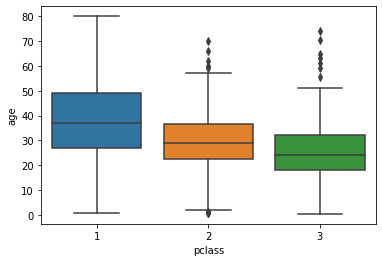

In [88]:
sns.boxplot(data['pclass'],data['age'])

In [74]:
data[['pclass','age']]

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
885,3,39.0
887,1,19.0
888,3,NaN
889,1,26.0


In [75]:
mean_age_pclass1 = np.round(data[data['pclass'] == 1]['age'].mean())
print(mean_age_pclass1)

38.0


In [76]:
mode_age_pclass2 = data[data['pclass'] == 2]['age'].mode()[0]
print(mode_age_pclass2)

24.0


In [77]:
mode_age_pclass3 = data[data['pclass'] == 3]['age'].mode()[0]
print(mode_age_pclass3)

22.0


In [112]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

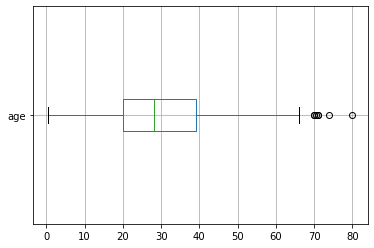

In [131]:
pd.DataFrame(data['age']).boxplot(vert=False)

In [133]:
data['age'].fillna(data['age'].mode()[0],inplace=True)

In [134]:
data['age'].isna().sum()

0

<AxesSubplot:>

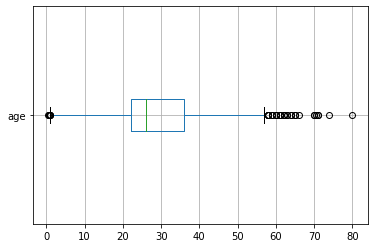

In [135]:
(pd.DataFrame(data['age'])).boxplot(vert=False)

In [136]:
for i in categorical_null:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [138]:
data.isna().sum().sum()

0

In [139]:
data.shape

(784, 15)

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int64   
 1   pclass       784 non-null    int64   
 2   sex          784 non-null    object  
 3   age          784 non-null    float64 
 4   sibsp        784 non-null    int64   
 5   parch        784 non-null    int64   
 6   fare         784 non-null    float64 
 7   embarked     784 non-null    object  
 8   class        784 non-null    category
 9   who          784 non-null    object  
 10  adult_male   784 non-null    bool    
 11  deck         784 non-null    category
 12  embark_town  784 non-null    object  
 13  alive        784 non-null    object  
 14  alone        784 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 97.0+ KB


In [143]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,784.000000,784.000000,784.000000,784.000000,784.000000,784.000000
mean,0.411990,2.243622,29.075791,0.522959,0.415816,34.711740
std,0.492507,0.855056,13.869905,0.986231,0.836922,52.160151
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,15.900000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,34.109350
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


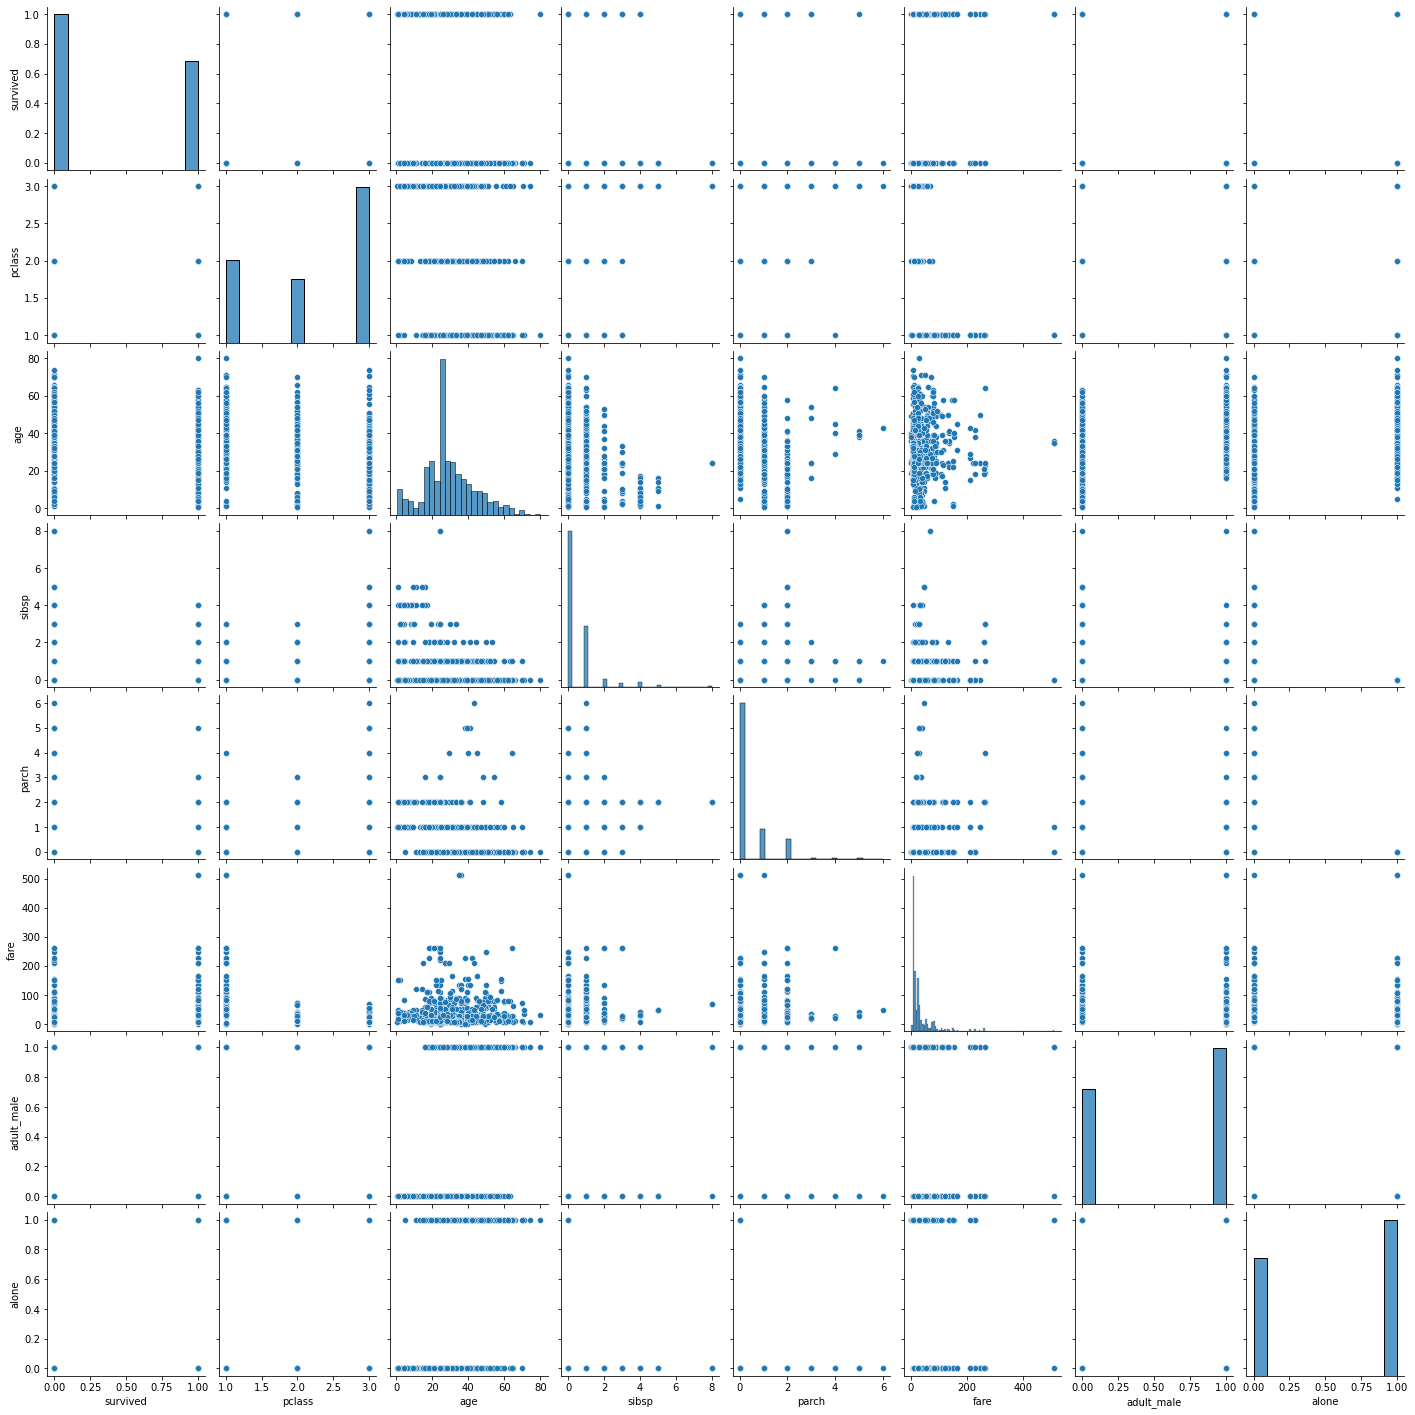

In [144]:
sns.pairplot(data)

<AxesSubplot:xlabel='age', ylabel='Count'>

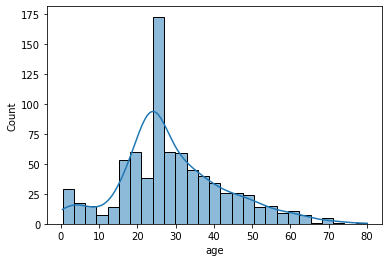

In [145]:
sns.histplot(data['age'],kde=True)

In [148]:
log10_transformation_age = np.log10(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

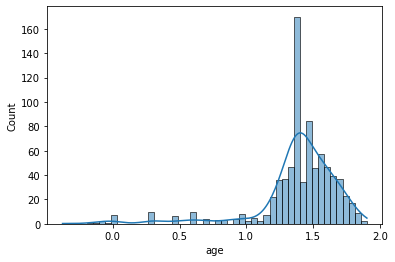

In [152]:
sns.histplot(log10_transformation_age,kde=True)

In [149]:
log2_transformation_age = np.log2(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

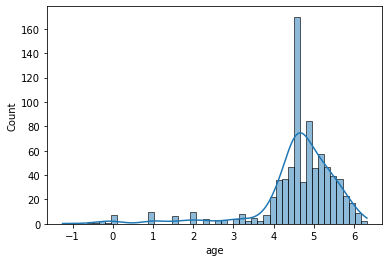

In [154]:
sns.histplot(log2_transformation_age,kde=True)

In [151]:
log_transformation_age = np.log(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

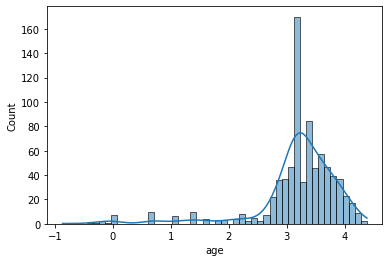

In [155]:
sns.histplot(log_transformation_age,kde=True)

In [156]:
sq_rt_transformation_age = np.sqrt(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

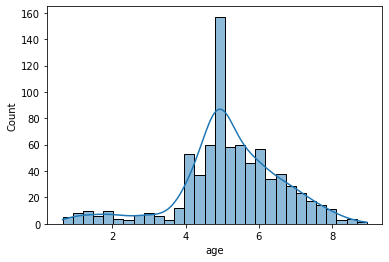

In [157]:
sns.histplot(sq_rt_transformation_age,kde=True)

In [158]:
cube_rt_transformation_age = np.cbrt(data['age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

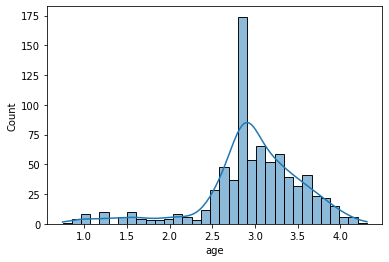

In [159]:
sns.histplot(cube_rt_transformation_age,kde=True)

In [167]:
exponential_transformation_age = round(np.exp(data['age']),2)

In [168]:
print(exponential_transformation_age.min())
print(exponential_transformation_age.max())

1.52
5.540622384393511e+34


ValueError: Maximum allowed size exceeded

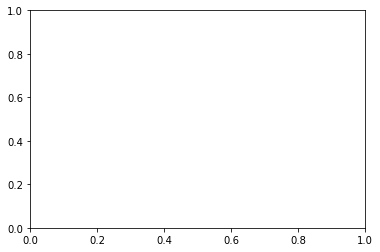

In [169]:
sns.histplot(exponential_transformation_age)

In [171]:
boxcox_transformation_age = stats.boxcox(data['age'])

C:\Users\Satyaki\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

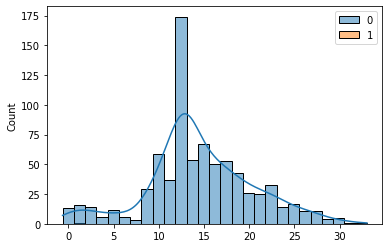

In [172]:
sns.histplot(boxcox_transformation_age,kde=True)

In [173]:
boxcox_transformation_age

(array([11.9053813 , 18.49237669, 13.64498393, 17.32379673, 17.32379673,
        12.78469428, 24.36747304,  0.90492242, 14.06857988,  8.14471428,
         2.41408598, 25.76018405, 11.00483016, 18.87646233,  8.14471428,
        24.71811447,  0.90492242, 12.78469428, 15.72379678, 12.78469428,
        17.32379673, 16.9285059 ,  8.64086585, 14.48808239,  4.93095881,
        18.49237669, 12.78469428, 10.54576331, 12.78469428, 12.78469428,
        19.25797489, 12.78469428, 12.78469428, 28.47270897, 14.48808239,
        20.01360006, 12.78469428, 11.45791701, 10.08031609,  8.14471428,
        19.25797489, 14.06857988, 12.78469428,  1.69317319, 10.54576331,
        12.78469428, 12.78469428, 12.78469428, 10.08031609,  4.34111328,
        11.45791701, 22.58782975, 14.9036752 , 28.13856475, 12.78469428,
        11.45791701, 14.6963566 ,  3.08873652,  6.59607888, 11.9053813 ,
        18.49237669, 21.12962551,  2.41408598, 12.78469428, 12.78469428,
        14.9036752 , 10.54576331,  9.60803742, 13.6

In [183]:
age_transform,l = stats.yeojohnson(data['age'])

In [184]:
age_transform_1,l_1 = stats.yeojohnson(age_transform)

In [185]:
print(l,l_1)

0.725893337729818 0.9975283552527535


In [186]:
age_transform_2,l_2 = stats.yeojohnson(age_transform_1)

In [187]:
print(l_1,l_2)

0.9975283552527535 0.9999803938877794


In [175]:
yeojohnson_transformation_age

(array([12.03756248, 18.30443972, 13.69347528, 17.19345198, 17.19345198,
        12.87460749, 23.88305747,  1.68059027, 14.0966355 ,  8.45896421,
         3.05341886, 25.20372692, 11.18029715, 18.66950131,  8.45896421,
        24.21562491,  1.68059027, 12.87460749, 15.67164703, 12.87460749,
        17.19345198, 16.81754785,  8.93075392, 14.49586729,  5.41138184,
        18.30443972, 12.87460749, 10.74332418, 12.87460749, 12.87460749,
        19.03206952, 12.87460749, 12.87460749, 27.77400907, 14.49586729,
        19.75003057, 12.87460749, 11.61160108, 10.30031825,  8.45896421,
        19.03206952, 14.0966355 , 12.87460749,  2.39080042, 10.74332418,
        12.87460749, 12.87460749, 12.87460749, 10.30031825,  4.85505802,
        11.61160108, 22.19448289, 14.89134249, 27.45752353, 12.87460749,
        11.61160108, 14.69406425,  3.68042409,  6.98799814, 12.03756248,
        18.30443972, 20.81007368,  3.05341886, 12.87460749, 12.87460749,
        14.89134249, 10.74332418,  9.85087149, 13.6

C:\Users\Satyaki\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='Count'>

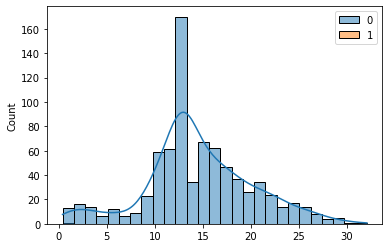

In [176]:
sns.histplot(yeojohnson_transformation_age,kde=True)

In [180]:
_

array([12.03756248, 18.30443972, 13.69347528, 17.19345198, 17.19345198,
       12.87460749, 23.88305747,  1.68059027, 14.0966355 ,  8.45896421,
        3.05341886, 25.20372692, 11.18029715, 18.66950131,  8.45896421,
       24.21562491,  1.68059027, 12.87460749, 15.67164703, 12.87460749,
       17.19345198, 16.81754785,  8.93075392, 14.49586729,  5.41138184,
       18.30443972, 12.87460749, 10.74332418, 12.87460749, 12.87460749,
       19.03206952, 12.87460749, 12.87460749, 27.77400907, 14.49586729,
       19.75003057, 12.87460749, 11.61160108, 10.30031825,  8.45896421,
       19.03206952, 14.0966355 , 12.87460749,  2.39080042, 10.74332418,
       12.87460749, 12.87460749, 12.87460749, 10.30031825,  4.85505802,
       11.61160108, 22.19448289, 14.89134249, 27.45752353, 12.87460749,
       11.61160108, 14.69406425,  3.68042409,  6.98799814, 12.03756248,
       18.30443972, 20.81007368,  3.05341886, 12.87460749, 12.87460749,
       14.89134249, 10.74332418,  9.85087149, 13.69347528, 16.05

In [181]:
l

0.725893337729818

In [182]:
data2 = dataset.copy()

<AxesSubplot:xlabel='sibsp', ylabel='Count'>

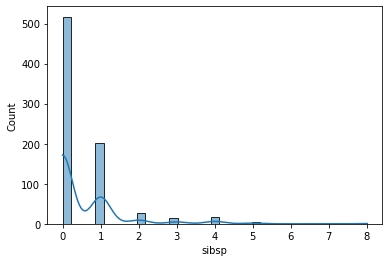

In [188]:
sns.histplot(data['sibsp'],kde=True)